In [90]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

from scipy.io import loadmat

import torch

In [152]:
subimgs = []
k = 0
for root, dirs, files in os.walk('data'):
    img = []
    for f in files:
        if f.startswith('img') and f.endswith('.mat'):
            d = loadmat(os.path.join(root, f), simplify_cells=True)
            imkeys = list(d.keys())
            for j in range(len(imkeys)):
                if imkeys[j].startswith('A_'):
                    img.append(d[imkeys[j]])
                imgs = np.array(img)
            subimgs.append(imgs)

In [172]:
k = 0
for i in range(len(subimgs)):
    for j in range(subimgs[i].shape[0]):
        np.save('data/images/img_{}.npy'.format(k), subimgs[i][j])
        k += 1

In [138]:
ims = []
imkeys = []

d = loadmat('data/IMAGE 49/img_0049.mat', simplify_cells=True)

for i in range(len(d.keys())):
    k = list(d.keys())[i]
    if k.startswith('A_'):
        ims.append(d[k])
        imkeys.append(k)

ims = np.array(ims)
print(imkeys)

['A_1', 'A_10', 'A_11', 'A_12', 'A_13', 'A_14', 'A_15', 'A_16', 'A_17', 'A_18', 'A_19', 'A_2', 'A_20', 'A_21', 'A_22', 'A_23', 'A_24', 'A_25', 'A_26', 'A_27', 'A_28', 'A_29', 'A_3', 'A_30', 'A_31', 'A_32', 'A_33', 'A_34', 'A_35', 'A_36', 'A_4', 'A_5', 'A_6', 'A_7', 'A_8', 'A_9']


In [139]:
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'AA', 'A_1', 'A_10', 'A_11', 'A_12', 'A_13', 'A_14', 'A_15', 'A_16', 'A_17', 'A_18', 'A_19', 'A_2', 'A_20', 'A_21', 'A_22', 'A_23', 'A_24', 'A_25', 'A_26', 'A_27', 'A_28', 'A_29', 'A_3', 'A_30', 'A_31', 'A_32', 'A_33', 'A_34', 'A_35', 'A_36', 'A_4', 'A_5', 'A_6', 'A_7', 'A_8', 'A_9', 'In', 'rgb'])

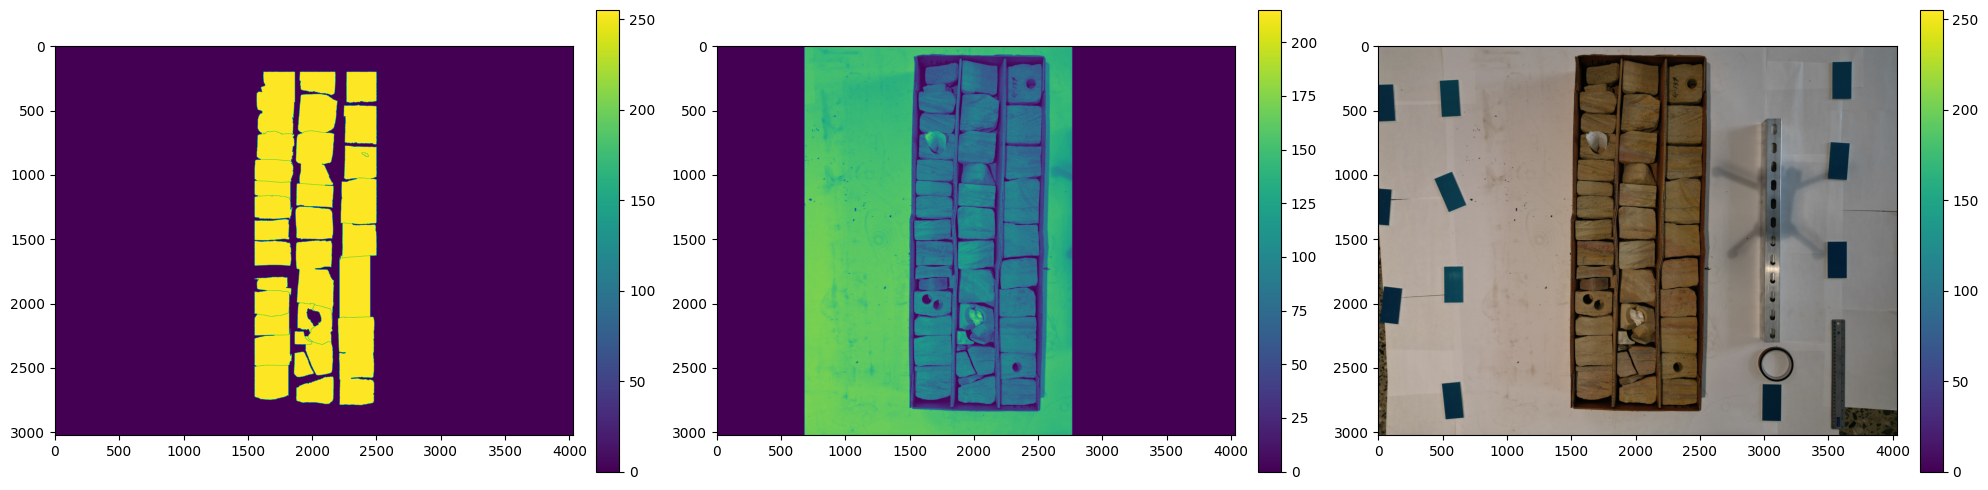

In [135]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.imshow(d['AA'])
plt.colorbar(pad=0.04, fraction=0.046)
plt.subplot(132)
plt.imshow(d['In'])
plt.colorbar(pad=0.04, fraction=0.046)
plt.subplot(133)
plt.imshow(d['rgb'])
plt.colorbar(pad=0.04, fraction=0.046)
plt.tight_layout()
plt.show()

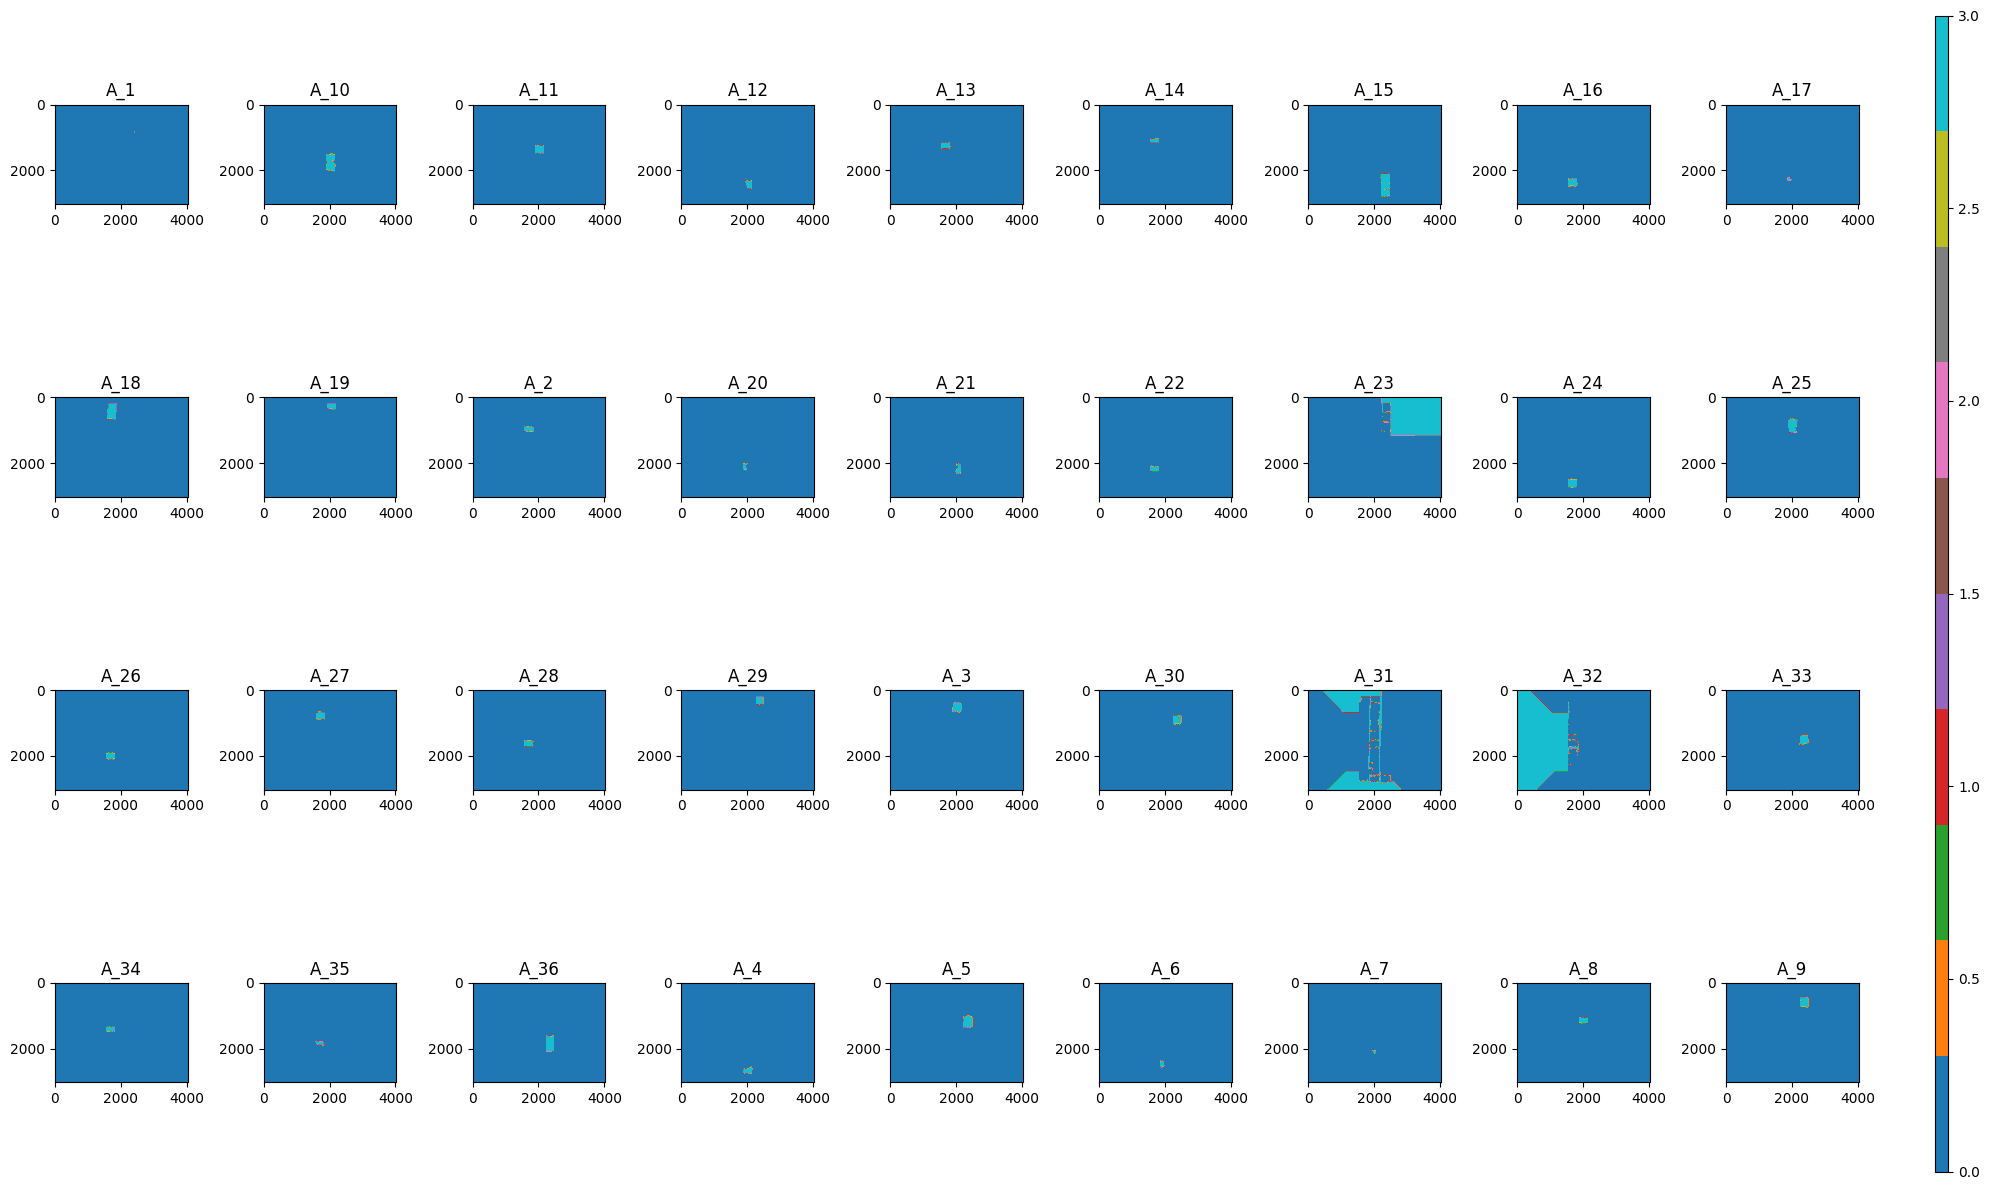

In [137]:
nrows = 4
fig = plt.figure(figsize=(20,nrows*3))
gs = GridSpec(nrows, ims.shape[0]//nrows+1, figure=fig, width_ratios=([1]*(ims.shape[0]//nrows))+[0.1])
cax = fig.add_subplot(gs[:, -1])

k = 0
for i in range(nrows):
    for j in range(ims.shape[0]//nrows):
        ax = fig.add_subplot(gs[i, j])
        im = ax.imshow(ims[k], cmap='tab10')
        ax.set(title=imkeys[k])
        k += 1

cb = plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()